In [14]:
import os 
import numpy as np
import tensorflow as tf 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import warnings 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

In [15]:
count = 0 
dirs = os.listdir('D:\Capstone_Internship_Projects\DataSets\PRCP-1001-RiceLeaf\Data\ALL_DATA_IMAGES/')
for dir in dirs:
    files = (list(os.listdir('D:\Capstone_Internship_Projects\DataSets\PRCP-1001-RiceLeaf\Data\ALL_DATA_IMAGES/'+dir)))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count+len(files)
print('Images Folder has ' + str(count) + ' Images')

Bacterial leaf blight Folder has 40 Images
Brown spot Folder has 40 Images
Leaf smut Folder has 39 Images
Images Folder has 119 Images


In [16]:
base_dir = 'D:\Capstone_Internship_Projects\DataSets\PRCP-1001-RiceLeaf\Data\ALL_DATA_IMAGES'
img_size = 180
batch = 16

In [17]:
train_dt = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    validation_split=0.2,
    subset='training',
    batch_size=batch,
    image_size=(img_size, img_size)
)

test_dt = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed=123,
    validation_split=0.2,
    subset='validation',
    batch_size=batch,
    image_size=(img_size, img_size)
)

Found 119 files belonging to 3 classes.
Using 96 files for training.
Found 119 files belonging to 3 classes.
Using 23 files for validation.


In [18]:
Bac_Name = train_dt.class_names
Bac_Name

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

- Why: You want to look at some images to check what’s in your dataset, and a batch is a small chunk of it (e.g., 8 images if your batch size is 8).
- Beginner analogy: Imagine you have a big photo album (train_dt), and you say, “Let me see just one page of photos.” That page has a few pictures (images) and labels saying what’s in each picture (labels).

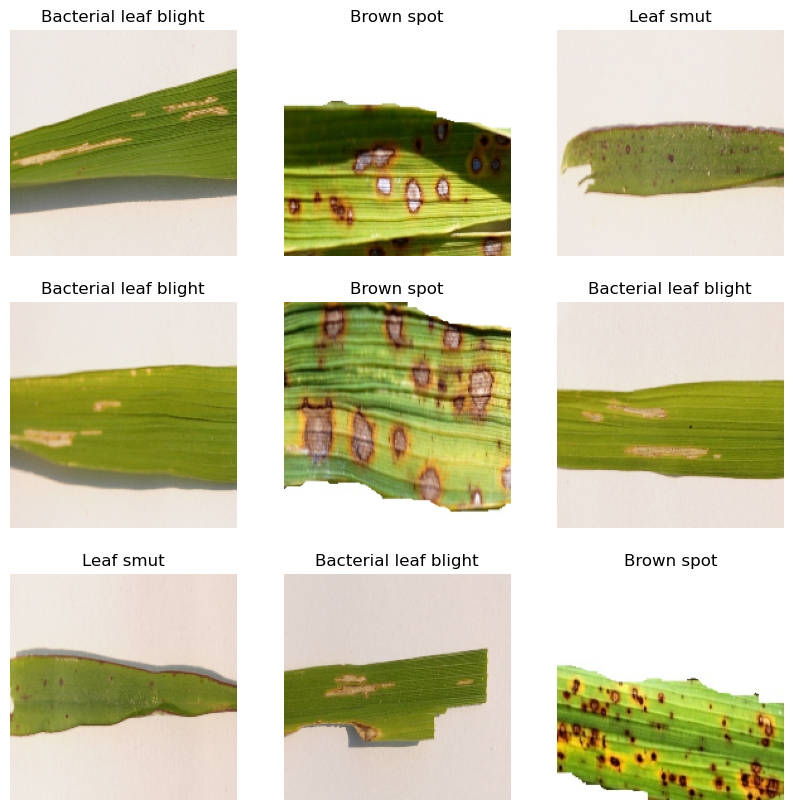

In [19]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_dt.take(1): # .take(1) says, “Just give me the first batch of data, not the whole dataset.”
    for i in range(9): # This is another loop that runs 9 times, with i taking values from 0 to 8 (0, 1, 2, ..., 8). Each time it loops, it processes one image from the batch.
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        '''
        images[i]: Picks the i-th image from the batch (e.g., images[0] is the first image).
        .numpy(): Converts the image from a TensorFlow format (a special computer-friendly version) to a regular format Python can use.
        .astype('uint8'): Makes sure the image’s numbers (pixel values) are in the range 0–255, which is what Matplotlib needs to draw it correctly (like adjusting brightness and color).
        '''
        plt.title(Bac_Name[labels[i]])
        plt.axis('off')

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

In [21]:
train_dt = train_dt.cache().shuffle(96).prefetch(buffer_size=AUTOTUNE)

In [22]:
test_dt = test_dt.cache().shuffle(23).prefetch(buffer_size=AUTOTUNE)

In [23]:
# Data Augmentation

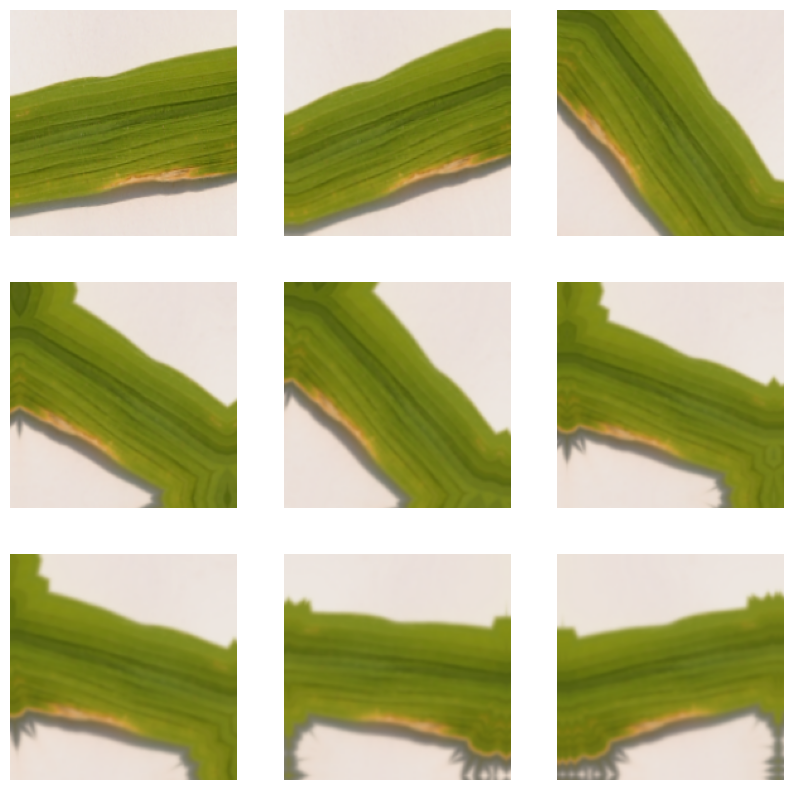

In [24]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_dt.take(1): # .take(1) says, “Just give me the first batch of data, not the whole dataset.”
    for i in range(9): # This is another loop that runs 9 times, with i taking values from 0 to 8 (0, 1, 2, ..., 8). Each time it loops, it processes one image from the batch.
        images = data_augmentation(images)
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.3250 - loss: 3.5192 - val_accuracy: 0.3043 - val_loss: 3.3984
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.2940 - loss: 2.9717 - val_accuracy: 0.2609 - val_loss: 2.1662
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.3997 - loss: 2.1998 - val_accuracy: 0.1739 - val_loss: 2.2737
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.4202 - loss: 2.1699 - val_accuracy: 0.1739 - val_loss: 2.0940
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.2692 - loss: 2.0778 - val_accuracy: 0.2609 - val_loss: 1.9626
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.4232 - loss: 1.8627 - val_accuracy: 0.2609 - val_loss: 1.9334
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.4158 - loss: 1.7882 - val_accuracy: 0.3043 - val_loss: 1.7882
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.3853 - loss: 1.6998 - val_accuracy: 0.3043 - val_loss:

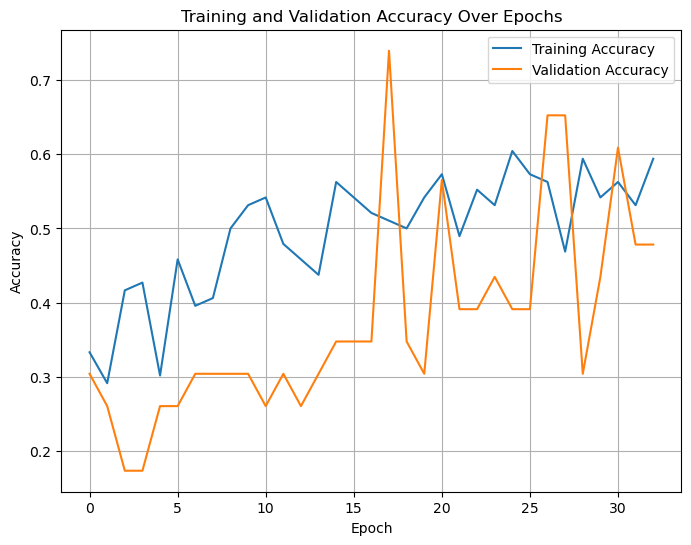

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

# Define data augmentation (as previously set up)
data_augmentation = tf.keras.Sequential(
    [ layers.Input(shape=(180, 180, 3)),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2)
])

# Define the simplified model (from previous recommendation)
model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and store the training history
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_dt,
                    validation_data=test_dt,
                    epochs=50,
                    callbacks=[early_stopping])

# Step 1: Print training and validation accuracy from the history
print("\nTraining and Validation Accuracy per Epoch:")
for epoch in range(len(history.history['accuracy'])):
    print(f"Epoch {epoch + 1}:")
    print(f"  Training Accuracy: {history.history['accuracy'][epoch]:.4f}")
    print(f"  Validation Accuracy: {history.history['val_accuracy'][epoch]:.4f}")

# Step 2: Evaluate the model on the training and validation sets
train_loss, train_accuracy = model.evaluate(train_dt, verbose=0)
test_loss, test_accuracy = model.evaluate(test_dt, verbose=0)

print("\nFinal Evaluation:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test (Validation) Accuracy: {test_accuracy:.4f}")

# Step 3: Plot the training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 442ms/step - accuracy: 0.2298 - loss: 1.9617 - val_accuracy: 0.4348 - val_loss: 1.0690
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.3637 - loss: 1.3873 - val_accuracy: 0.4348 - val_loss: 1.3026
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - accuracy: 0.4850 - loss: 1.1844 - val_accuracy: 0.3478 - val_loss: 1.1118
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.3829 - loss: 1.3396 - val_accuracy: 0.6522 - val_loss: 0.8556
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 0.4685 - loss: 1.0442 - val_accuracy: 0.6087 - val_loss: 0.9332
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.5655 - loss: 0.8835 - val_accuracy: 0.6522 - val_loss: 0.8323
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.6198 - loss: 1.0058 - val_accuracy: 0.6087 - val_loss: 0.8175
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.6065 

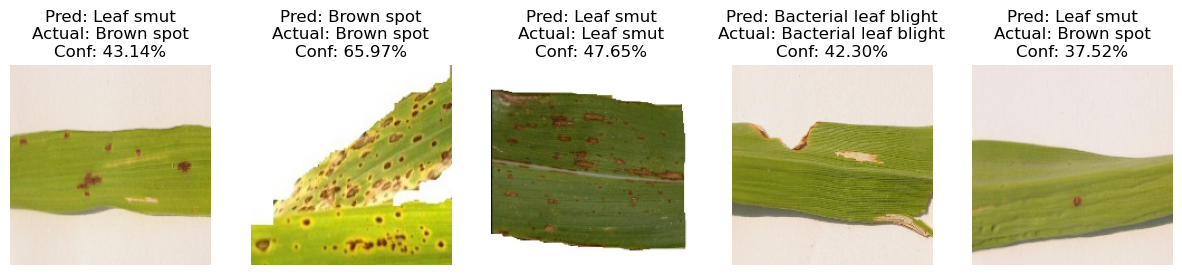

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define class names (replace with your actual class names)
Bac_Name = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']  # Adjust based on your 5 classes

# Step 2: Define data augmentation and model (using transfer learning with MobileNetV2)
data_augmentation = tf.keras.Sequential([
     layers.Input(shape=(180, 180, 3)),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2)
])

# Load pre-trained MobileNetV2
base_model = MobileNetV2(input_shape=(180, 180, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Build the model
model = models.Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # Softmax for probabilities
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the model (skip if already trained)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_dt,
                    validation_data=test_dt,
                    epochs=50,
                    callbacks=[early_stopping])

# Step 4: Get predictions on the test set
# Collect all images and labels from test_dt
test_images = []
test_labels = []
for images, labels in test_dt:
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())

# Concatenate all batches into a single array
test_images = np.concatenate(test_images, axis=0)  # Shape: (24, 180, 180, 3)
test_labels = np.concatenate(test_labels, axis=0)  # Shape: (24,)

# Make predictions
predictions = model.predict(test_images)  # Shape: (24, 5) - probabilities for each class

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)  # Get the class with the highest probability
probabilities = np.max(predictions, axis=1)  # Get the highest probability for each prediction

# Step 5: Compare predictions with actual labels and display results
correct_predictions = 0
print("\nPrediction Results for Test Data:")
for i in range(len(test_labels)):
    predicted_class = Bac_Name[predicted_classes[i]]
    actual_class = Bac_Name[test_labels[i]]
    probability = probabilities[i] * 100  # Convert to percentage
    print(f"Image {i + 1}:")
    print(f"  Model predicted: {predicted_class}")
    print(f"  Actual class: {actual_class}")
    print(f"  Confidence: {probability:.2f}%")
    if predicted_class == actual_class:
        correct_predictions += 1
    print()

# Calculate overall accuracy
test_accuracy = correct_predictions / len(test_labels)
print(f"Overall Test Accuracy: {test_accuracy:.4f} ({correct_predictions}/{len(test_labels)} correct)")

# Step 6: Visualize some test images with predictions (optional)
plt.figure(figsize=(15, 5))
for i in range(min(5, len(test_images))):  # Show up to 5 images
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].astype('uint8'))
    predicted_class = Bac_Name[predicted_classes[i]]
    actual_class = Bac_Name[test_labels[i]]
    probability = probabilities[i] * 100
    plt.title(f"Pred: {predicted_class}\nActual: {actual_class}\nConf: {probability:.2f}%")
    plt.axis('off')
plt.show()